<a href="https://colab.research.google.com/github/naga-kj/portfolio/blob/main/Prediction_CreditCard_Default_Group3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Problem Statement:**
*   This project aims to forecast the likelihood of customer default payments.
*   From the standpoint of risk management, the predictive accuracy of the estimated probability of default will be more valuable than the binary classification-credible or not credible clients. We must determine which customers will miss credit card payments.
*   Financial threats are exhibiting a trend in commercial banks' credit risk in credit client risk prediction.
*   The current project is designed to analyze and predict the aforementioned dataset.
*   This project identifies customers who are more likely to default on their credit cards in the coming month.

**Type of machine learning:**
*   We're using supervised machine learning because we have the target attribute and some training data with known values for the target attribute.
*   It is a classification problem because the target is a category (yes or no) rather than a number.





*   **Feature variables:** X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X12, X13, X14, X15, X16, X17, X18, X19, X20, X21, X22, X23.

*   **Target variable:** Y(default)







**EDA:**
*   From April 2005 to September 2005, this dataset contains information on credit card clients' default payments, demographic factors, credit limit, payment history, and bill statements.
*   It has 30,000 rows and 25 columns, but no credit score or history data. Overall, the dataset is very clean, but there are a few undocumented column values.
*   As a result, the majority of the time spent wrangling data was spent searching for information and interpreting the columns.
*   The goal of exploratory data analysis is to identify the variables that influence payment default likelihood as well as the relationships between them. To test each categorical variable, we use graphical and statistical data exploratory analysis tools.
*   Each begins with a visualization, followed by a statistical test to validate the results.

# **Data Preparation**

Importing data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

cc_data = pd.read_csv('https://raw.githubusercontent.com/franklin-univ-data-science/data/master/credit_default.csv')

cc_data

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Checking for the top-most rows

In [ ]:
cc_data.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


Checking for the bottom-most rows

In [ ]:
cc_data.tail()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


Summarize basic statistical data

In [ ]:
cc_data.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000



*   There are 30000 distinct credit card clients.
*   The average value for the amount of credit card limit is 167484.(X1)
*   Education Level is mostly graduate school and university. (X3)
*   Most of the clients are either married or single.(X4)
*   Average age is 35.5 years, with a standard deviation of 9.2(X5)
*   As the value 0 for default payment means 'not default' and value 1 means 'default', the mean of 0.22 means that there are 22.1% of credit card contracts
that will default next month (will verify this in the next sections of this analysis).(Y)

**Data Pre-processing / Cleaning**

Dealing with missing values

In [ ]:
cc_data.isna().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

In [ ]:
cc_data.isnull().sum()

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64


*   No missing values and null values found

In [ ]:
cc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   ID      30000 non-null  int64
 1   X1      30000 non-null  int64
 2   X2      30000 non-null  int64
 3   X3      30000 non-null  int64
 4   X4      30000 non-null  int64
 5   X5      30000 non-null  int64
 6   X6      30000 non-null  int64
 7   X7      30000 non-null  int64
 8   X8      30000 non-null  int64
 9   X9      30000 non-null  int64
 10  X10     30000 non-null  int64
 11  X11     30000 non-null  int64
 12  X12     30000 non-null  int64
 13  X13     30000 non-null  int64
 14  X14     30000 non-null  int64
 15  X15     30000 non-null  int64
 16  X16     30000 non-null  int64
 17  X17     30000 non-null  int64
 18  X18     30000 non-null  int64
 19  X19     30000 non-null  int64
 20  X20     30000 non-null  int64
 21  X21     30000 non-null  int64
 22  X22     30000 non-null  int64
 23  X23     300


*   Renaming the column names for better readability

In [ ]:
cc_data.rename({'X1':'credit_limit',
             'X2': 'gender',
             'X3': 'education',
             'X4': 'marital_status',
             'X5': 'age',
             'X6': 'sep_hist',
             'X7': 'aug_hist',
             'X8': 'jul_hist',
             'X9': 'jun_hist',
             'X10': 'may_hist',
             'X11': 'apr_hist',
             'X12': 'bill_amt_sep',
             'X13': 'bill_amt_aug',
             'X14': 'bill_amt_jul',
             'X15': 'bill_amt_jun',
             'X16': 'bill_amt_may',
             'X17': 'bill_amt_apr',
             'X18': 'sep_amt_paid',
             'X19': 'aug_amt_paid',
             'X20': 'jul_amt_paid',
             'X21': 'jun_amt_paid',
             'X22': 'may_amt_paid',
             'X23': 'apr_amt_paid',
             'Y': 'default'}, axis=1, inplace=True)

cc_data

,ID,credit_limit,gender,education,marital_status,age,sep_hist,aug_hist,jul_hist,jun_hist,...,bill_amt_jun,bill_amt_may,bill_amt_apr,sep_amt_paid,aug_amt_paid,jul_amt_paid,jun_amt_paid,may_amt_paid,apr_amt_paid,default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Inspecting duplicates

In [ ]:
cc_data.duplicated().sum()

0


*   No duplicates found


****

Replacing index with ID column

In [ ]:
cc_data.set_index('ID', inplace=True)
cc_data.columns

Index(['credit_limit', 'gender', 'education', 'marital_status', 'age',
       'sep_hist', 'aug_hist', 'jul_hist', 'jun_hist', 'may_hist', 'apr_hist',
       'bill_amt_sep', 'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun',
       'bill_amt_may', 'bill_amt_apr', 'sep_amt_paid', 'aug_amt_paid',
       'jul_amt_paid', 'jun_amt_paid', 'may_amt_paid', 'apr_amt_paid',
       'default'],
      dtype='object')

**Checking the feature variables and modifying if necessary**

**Categorical features**


*   Gender

In [ ]:
cc_data['gender'].value_counts()

2    18112
1    11888
Name: gender, dtype: int64

1 ----> Male

2 ----> Female



*   Education

In [ ]:
cc_data['education'].value_counts(ascending=True)


0       14
6       51
4      123
5      280
3     4917
1    10585
2    14030
Name: education, dtype: int64

The 'education' column has few unknown educational statuses 0,5,6 recorded which are not given in the description. Therefore, we are adding these to 4, which is "others".  

1 ----> Graduate school

2 ----> University

3 ----> High School

4 ------> Others

0, 5, 6 are undocumented

In [ ]:
# Moving all the values of 0,5,6 to 4 which is others
# 1=graduate school, 2=university, 3=high school, 4=others

cc_data['education'] = cc_data['education'].replace([0,5,6], 4)
cc_data['education'].value_counts(ascending=True)


4      468
3     4917
1    10585
2    14030
Name: education, dtype: int64


*   Marital Status

In [ ]:
cc_data['marital_status'].value_counts()

2    15964
1    13659
3      323
0       54
Name: marital_status, dtype: int64

1 ----> Married

2 ----> Single

3 ----> Others

0 not documented

In [ ]:
# Moving all the values of 0 to 3 which is others as mentioned in the data description
# 1=married, 2=single, 3=others

cc_data['marital_status'] = cc_data['marital_status'].replace([0], 3)
cc_data['marital_status'].value_counts(ascending=True)

3      377
1    13659
2    15964
Name: marital_status, dtype: int64


*   Age

In [ ]:
cc_data['age'].value_counts()

29    1605
27    1477
28    1409
30    1395
26    1256
31    1217
25    1186
34    1162
32    1158
33    1146
24    1127
35    1113
36    1108
37    1041
39     954
38     944
23     931
40     870
41     824
42     794
44     700
43     670
45     617
46     570
22     560
47     501
48     466
49     452
50     411
51     340
53     325
52     304
54     247
55     209
56     178
58     122
57     122
59      83
60      67
21      67
61      56
62      44
63      31
64      31
66      25
65      24
67      16
69      15
70      10
68       5
73       4
72       3
75       3
71       3
79       1
74       1
Name: age, dtype: int64

**Numerical features**


*   Credit limit


In [ ]:
cc_data['credit_limit'].value_counts()

50000      3365
20000      1976
30000      1610
80000      1567
200000     1528
           ... 
730000        2
1000000       1
327680        1
760000        1
690000        1
Name: credit_limit, Length: 81, dtype: int64


*   Replacing gender variable values

In [ ]:
cc_data['gender'] = cc_data['gender'].replace(2, 0)
cc_data.head()

,credit_limit,gender,education,marital_status,age,sep_hist,aug_hist,jul_hist,jun_hist,may_hist,...,bill_amt_jun,bill_amt_may,bill_amt_apr,sep_amt_paid,aug_amt_paid,jul_amt_paid,jun_amt_paid,may_amt_paid,apr_amt_paid,default
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,0,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,0,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,0,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,0,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**Updated:**

 0 ----> Female

 1 ----> Male

**Exploratory Data Analysis**

**Visualization**


*   Univariate plots

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

def visualize(data_frame,col_name):
  fig, ax = plt.subplots(1,3, figsize=(16,10))
  ax1 = sns.countplot(x=col_name, data=data_frame, ax=ax[0])
  for p in ax1.patches:
   ax1.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

  sns.boxplot(y=col_name, data=data_frame, showfliers=True, ax=ax[1])

  cc_data.groupby(col_name).size().plot(kind='pie',autopct='%1.2f%%', textprops={'fontsize': 12},
                                 ax=ax[2])



* **Gender**

Text(0, 0.5, 'Count')

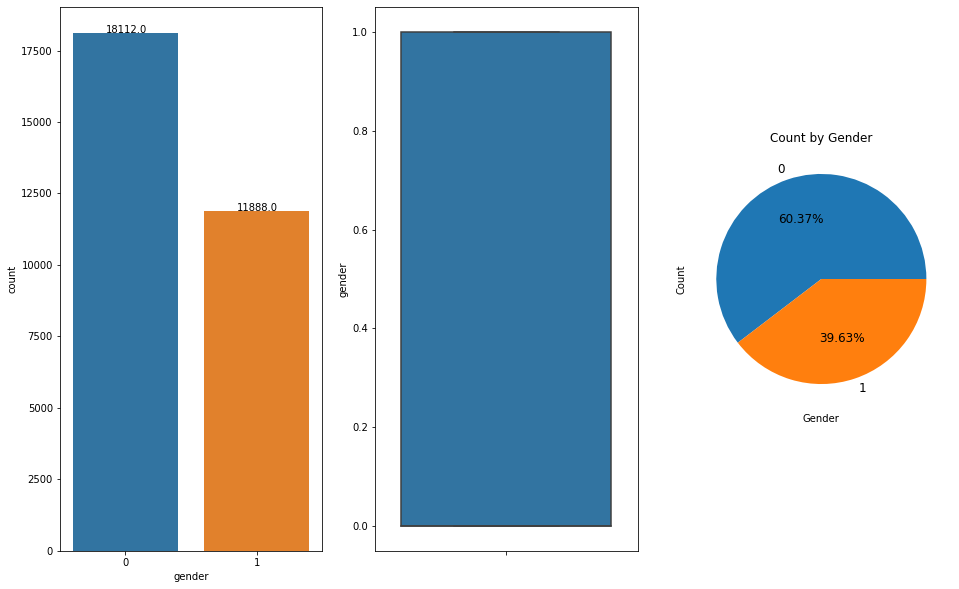

In [ ]:
visualize(cc_data,'gender')
plt.title("Count by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

0 ----> Female

1  ----> Male


* Females account for 18112 (60.37%) of the 30,000 customers, while males account for 11888 (39.6%).



*   **Education**

Text(0, 0.5, 'Count')

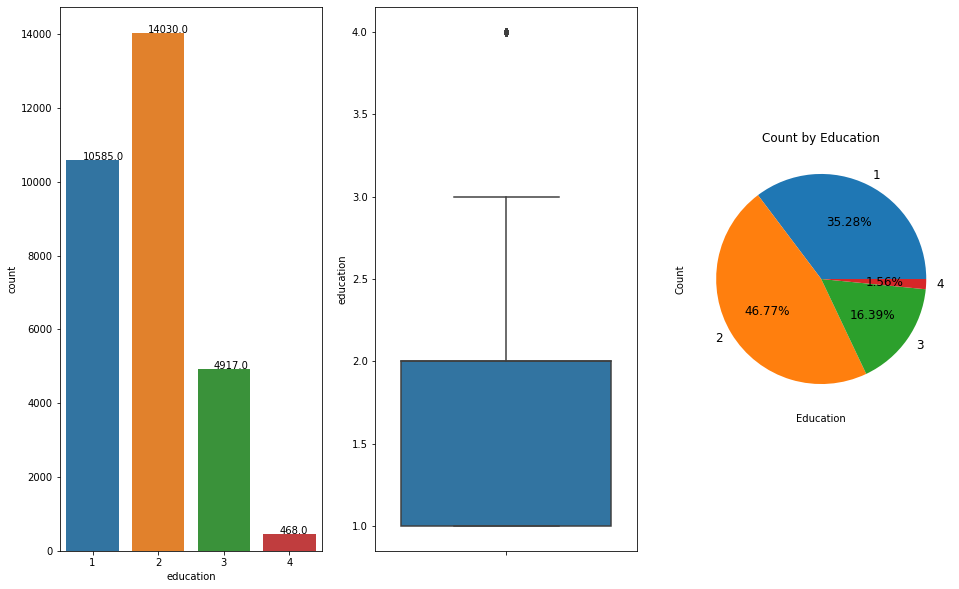

In [ ]:
visualize(cc_data,'education')

plt.title("Count by Education")
plt.xlabel("Education")
plt.ylabel("Count")

1  ----> Graduate school

2 ----> University

3  ----> High School

4 ------> Others



*   Out of 30,000 customers, 14030 (46.77%) are university graduates, followed by graduate school, and others 468 (1.56%).



*   **Marital status**

Text(0, 0.5, 'Count')

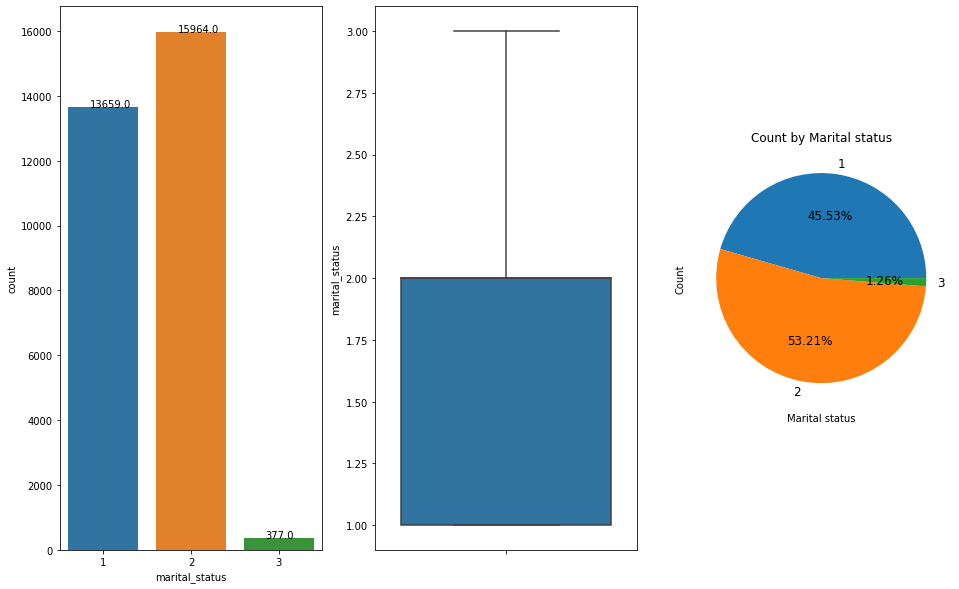

In [ ]:
visualize(cc_data,'marital_status')
plt.title("Count by Marital status")
plt.xlabel("Marital status")
plt.ylabel("Count")

1  ----> Married

2 ----> Single

3  ----> Others


*   Out of 30000 people, 15964 are single. Married people make up the next largest group, followed by others.


*   **Age**

<Axes: ylabel='age'>

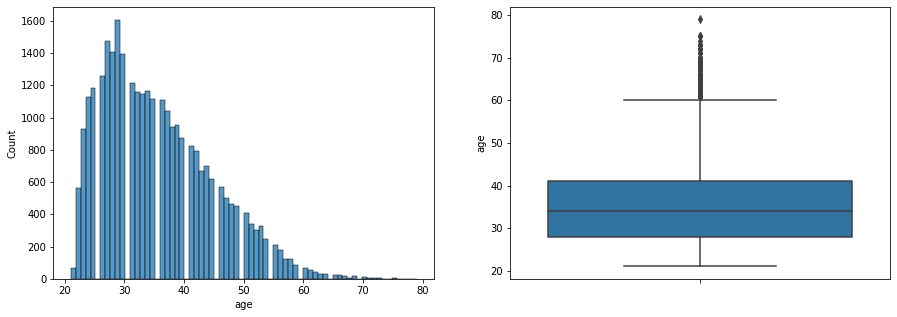

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(x='age', data=cc_data, ax=ax[0])
sns.boxplot(y='age', data=cc_data, showfliers=True, ax=ax[1])



*   More number of credit card holders are aged between 25-30 years.
*   Elderly people over age of 60 appear to use credit cards less frequently..




*   **Credit Limit**

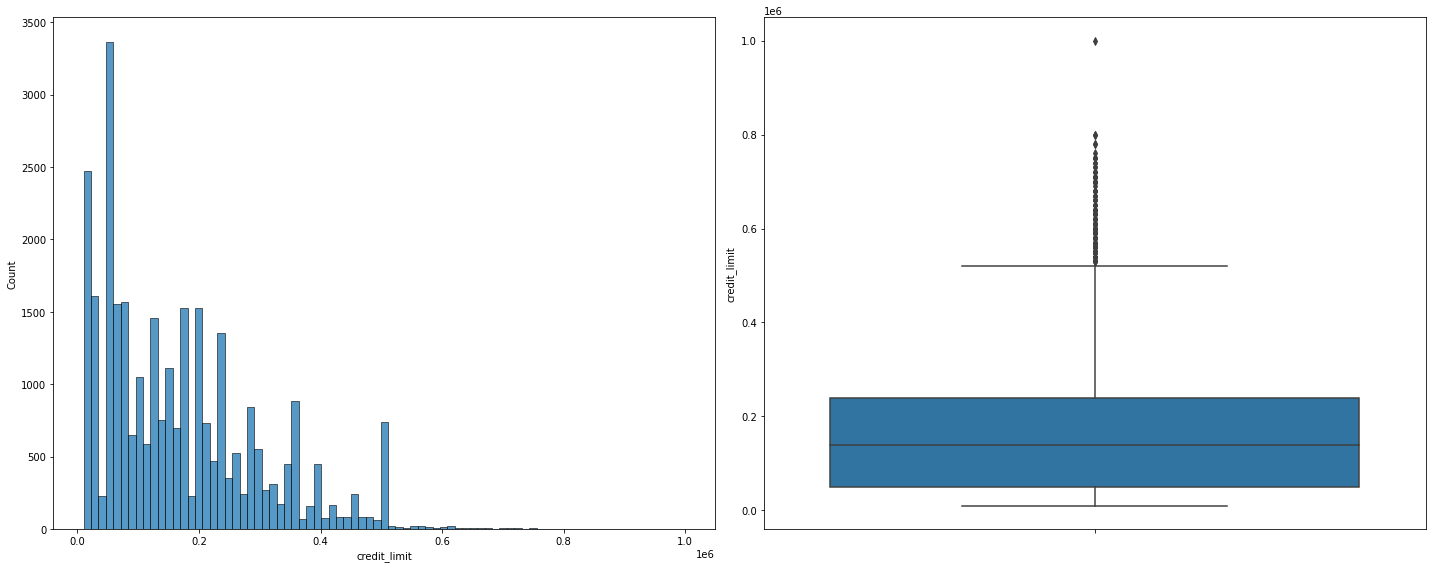

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(20,8))
sns.histplot(x='credit_limit', data=cc_data, ax=ax[0])
sns.boxplot(y='credit_limit', data=cc_data, showfliers=True, ax=ax[1])
plt.tight_layout()


*   Checking for outlier

In [ ]:
# Examine the outlier carefully.
# The observations from other columns indicate that this was just a customer who has an excellent payment history
# Therefore it should be considered as a valid data

outliers = cc_data.loc[cc_data['credit_limit']>900000]
outliers

,credit_limit,gender,education,marital_status,age,sep_hist,aug_hist,jul_hist,jun_hist,may_hist,...,bill_amt_jun,bill_amt_may,bill_amt_apr,sep_amt_paid,aug_amt_paid,jul_amt_paid,jun_amt_paid,may_amt_paid,apr_amt_paid,default
ID,,,,,,,,,,,,,,,,,,,,,
2198,1000000,0,1,1,47,0,0,0,-1,0,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0



*   Previous payment status (History of past payment)

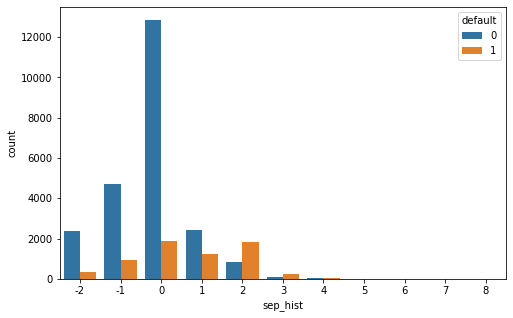

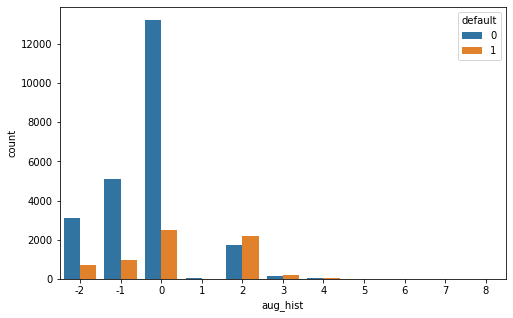

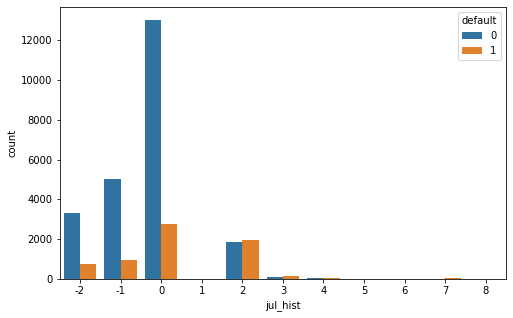

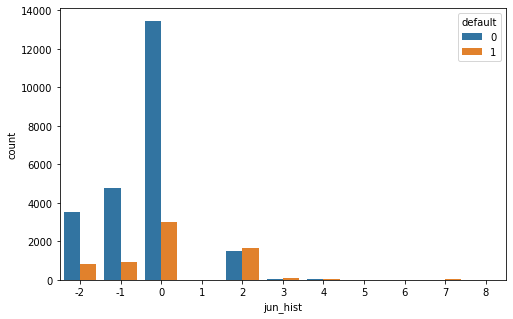

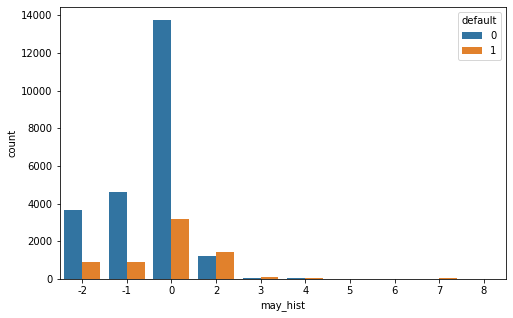

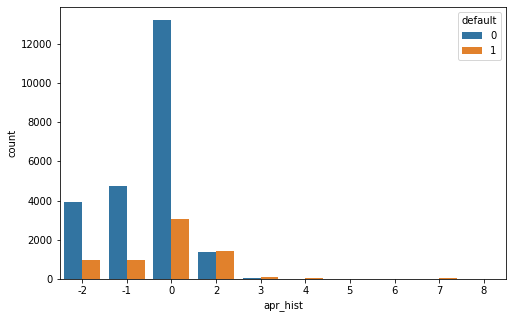

In [ ]:
# Plotting (X6-11)
# 0--no default, 1--default
prev_repayment_status = cc_data[['sep_hist','aug_hist','jul_hist','jun_hist','may_hist','apr_hist']]
for idx,col in enumerate(prev_repayment_status):
  plt.figure(figsize=(8,5))
  fig.add_subplot(2, 3, idx+1)
  sns.countplot(x=col,hue='default',data=cc_data)

Based on the above graphs, we can observe that more non-defaults are counted in each month.


*   Total bill amount

In [ ]:
# Assigning the bill amount varaibles into a single variable (X12-17)
total_bill_amt = cc_data[['bill_amt_sep','bill_amt_aug','bill_amt_jul','bill_amt_jun','bill_amt_may','bill_amt_apr']]


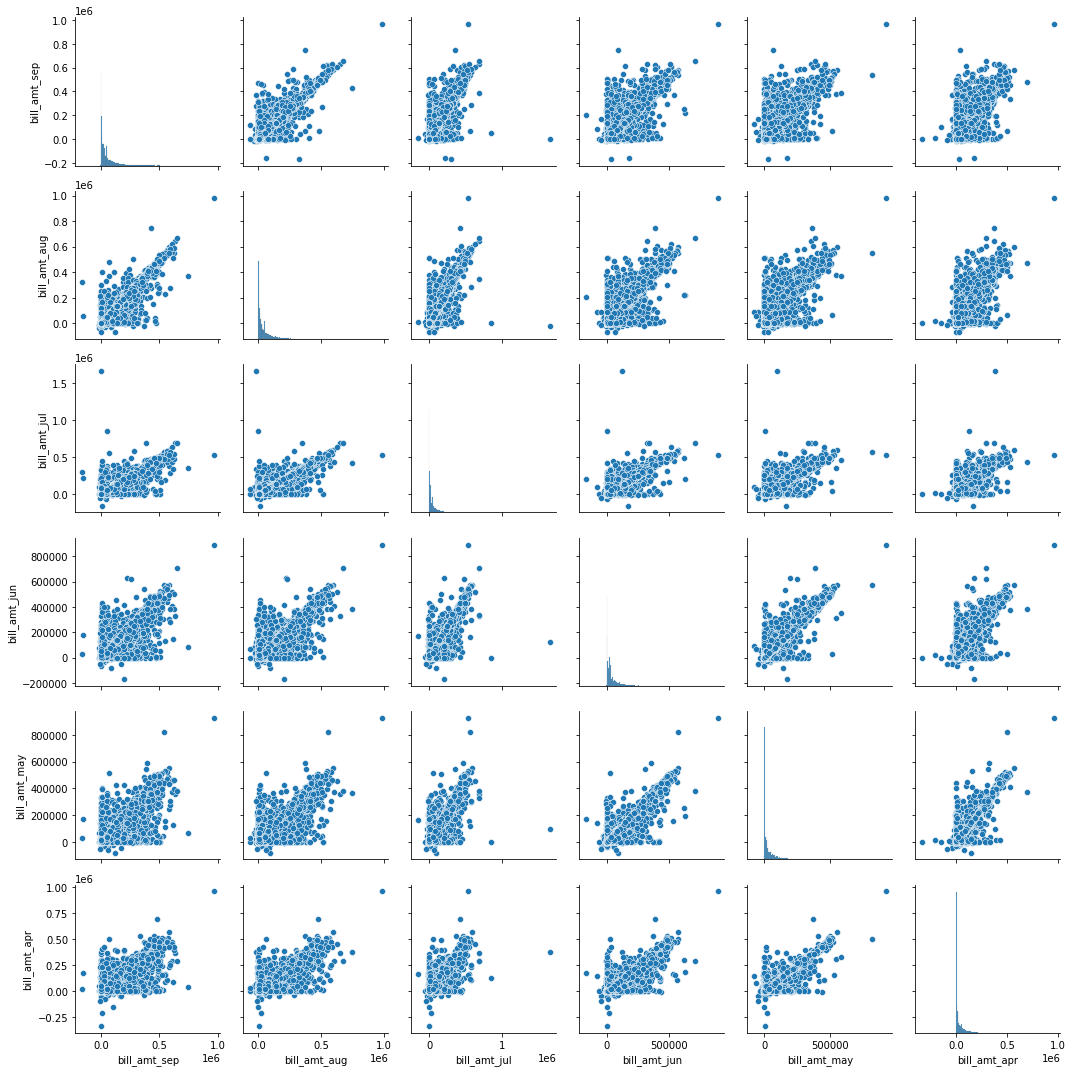

In [ ]:
# Plotting the pairplot for Total bill amount
sns.pairplot(data = total_bill_amt)
plt.tight_layout()


*   All the bill amount variables are correlated to each other from the above pairplot.

*   Amount paid

In [ ]:
# (X 18-23)
amt_paid = cc_data[['sep_amt_paid','aug_amt_paid','jul_amt_paid','jun_amt_paid','may_amt_paid','apr_amt_paid']]

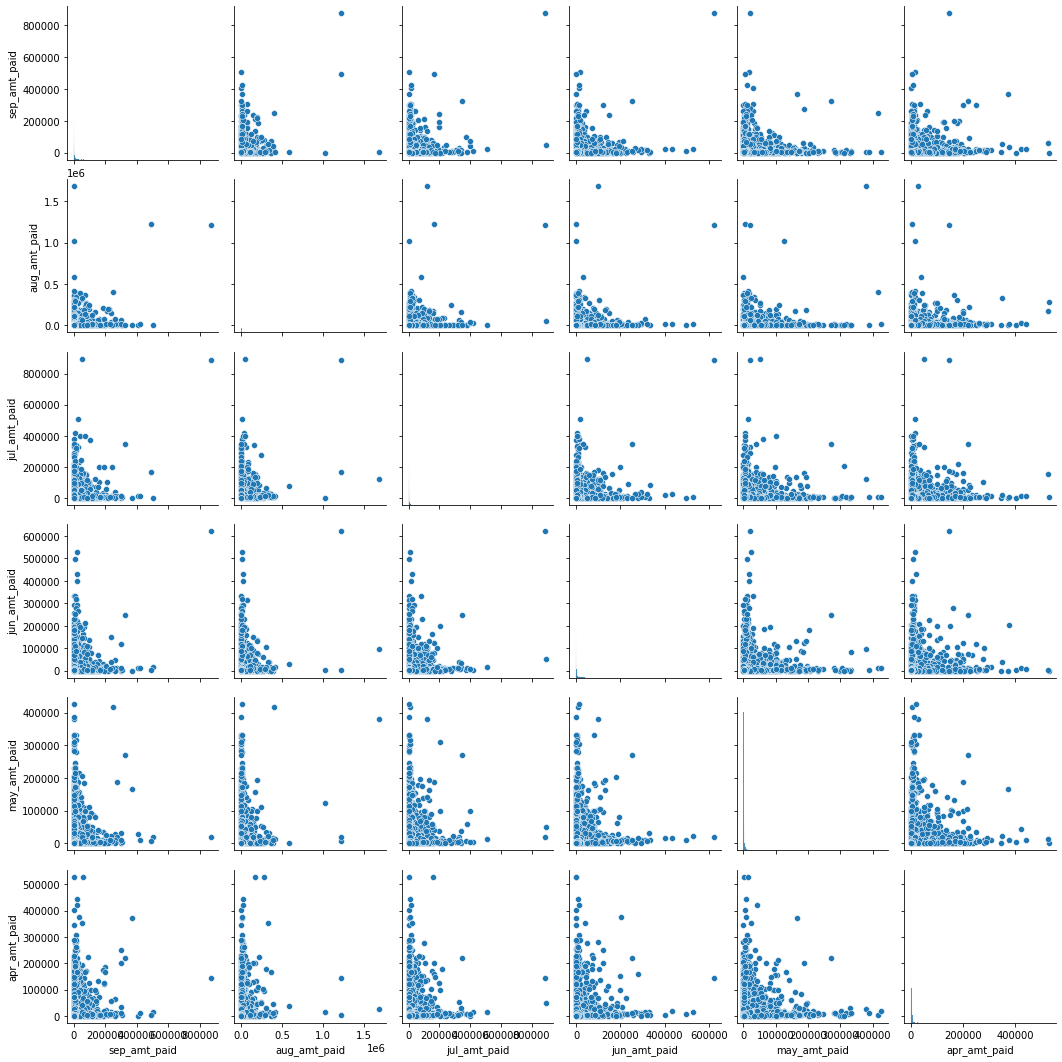

In [ ]:
# Plotting the pairplot for Total bill amount
sns.pairplot(data = amt_paid)

**Bivariate plots**


*   Correlation matrix

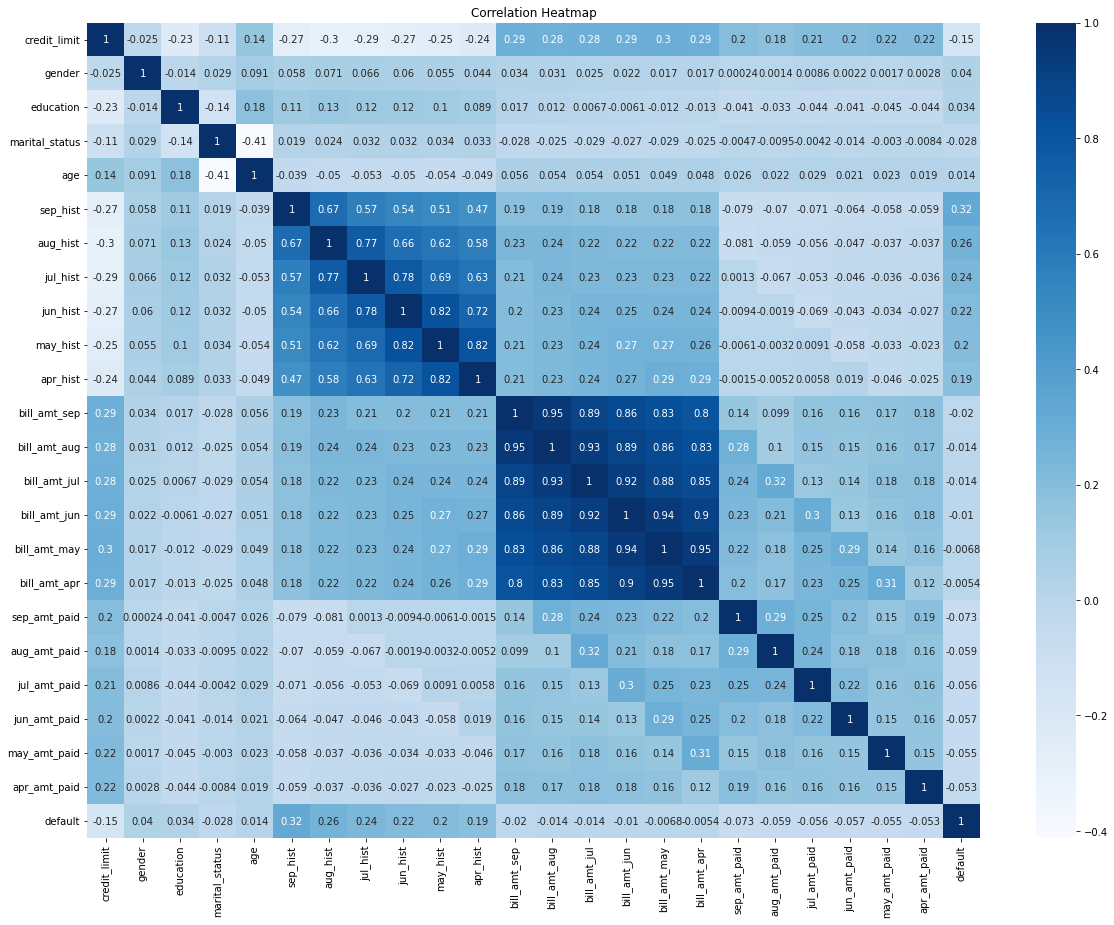

In [ ]:
# Correlation between different variables
corr = cc_data.corr()
# Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(20, 15))
# Configure a custom diverging colormap
cmap = sns.diverging_palette(20, 230, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


*   All the variables are correlated to the target variable, 'default'.
*   Not dropping any variable


*   Checking for customers if they had any default payment history

In [ ]:
# Create a new column "has_def" to indicate customers who have at least 1 deafult payment from sep_hist to apr_hist
# 0 : no default ; 1: has default

def_condition = (cc_data.sep_hist >1) | (cc_data.aug_hist >1) | (cc_data.jul_hist >1) | (cc_data.jun_hist >1) | (cc_data.may_hist >1) | (cc_data.apr_hist >1)
cc_data.loc[def_condition, "has_def"] = 1
cc_data.loc[cc_data.has_def.isna(), "has_def"] = 0



In [ ]:
# Define a function to plot stacked bar chart since there will be multiple stacked bars charts to plot

def create_stacked_bar(column_name):

    # Get the percentage of default by each group
    default_by_group = pd.crosstab(index=cc_data['has_def'],columns = cc_data[column_name], normalize = 'columns')

    # Round up to 2 decimal
    default_by_group = default_by_group.apply(lambda x: round(x,2))

    labels = default_by_group.columns
    list1 = default_by_group.iloc[0].to_list()
    list2 = default_by_group.iloc[1].to_list()

    list1_name = "No default"
    list2_name = "Has default"
    title = f"Default by {column_name}"
    xlabel = column_name
    ylabel = "Default percentage"

    fig, ax = plt.subplots(figsize=(10, 5))
    bar_width = 0.5

    ax1 = ax.bar(labels,list1, bar_width, label = list1_name)
    ax2 = ax.bar(labels,list2, bar_width, bottom = list1, label = list2_name)

    ax.set_title(title, fontweight = "bold")
    ax.set_xlabel(xlabel, fontweight = "bold")
    ax.set_ylabel(ylabel, fontweight = "bold")
    ax.legend(loc="best")

    plt.xticks(list(range(len(labels))), labels)
    plt.yticks(fontsize=9)

    for r1, r2 in zip(ax1, ax2):
        h1 = r1.get_height()
        h2 = r2.get_height()
        plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., f"{h1:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
        plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., f"{h2:.0%}", ha="center", va="center", color="white", fontsize=9, fontweight="bold")
    plt.tight_layout()
    plt.show()

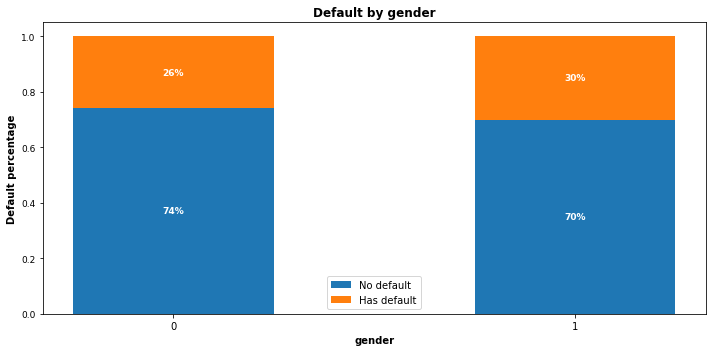

In [ ]:
# 0 - female, 1 - male
create_stacked_bar('gender')


*   In the last six months, 30% of men and 26% of women have missed a payment.


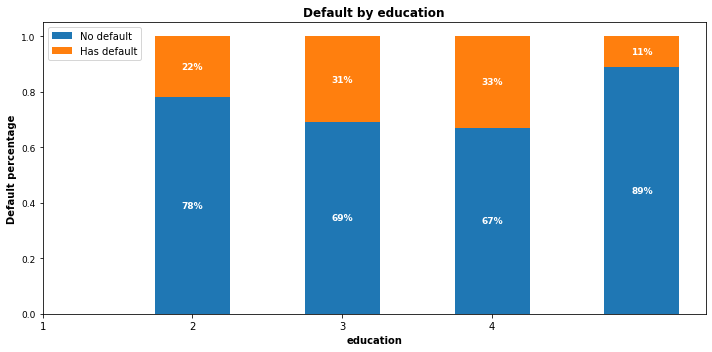

In [ ]:
create_stacked_bar('education')


*   According to the data, customers with less educational backgrounds default more frequently.

*   Customers with a high school or university education had higher default percentages than those with a graduate degree.


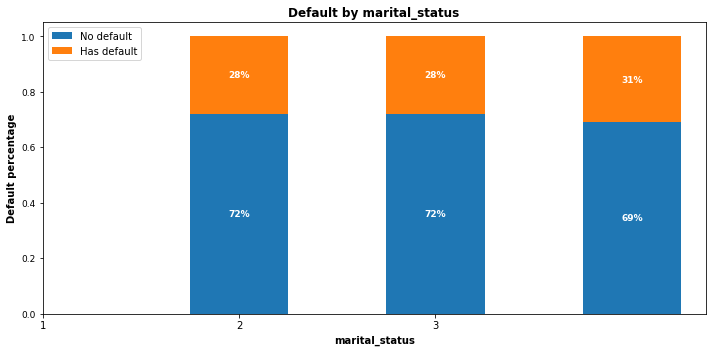

<Figure size 432x288 with 0 Axes>

In [ ]:
create_stacked_bar('marital_status')
plt.tight_layout()


*   Despite the fact that the group with the "other" marital status had a high default percentage, there is no difference in default risk based on marital status.


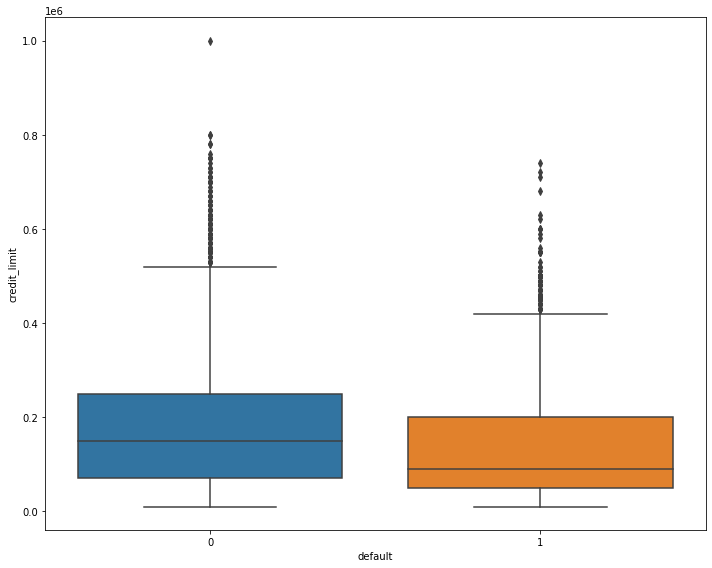

In [ ]:
# 0 - non default, 1 - default
plt.figure(figsize=(10,8))

sns.boxplot(x='default',y='credit_limit',data=cc_data)
plt.tight_layout()


*   High credit limit customers typically have higher "no-default" rates.

**Encode categorical variables**

In [ ]:
#one hot encoding
cc_data = pd.get_dummies(cc_data,columns=['gender','marital_status','education'])
cc_data.head()


,credit_limit,age,sep_hist,aug_hist,jul_hist,jun_hist,may_hist,apr_hist,bill_amt_sep,bill_amt_aug,...,has_def,gender_0,gender_1,marital_status_1,marital_status_2,marital_status_3,education_1,education_2,education_3,education_4
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,1.0,1,0,1,0,0,0,1,0,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,1.0,1,0,0,1,0,0,1,0,0
3,90000,34,0,0,0,0,0,0,29239,14027,...,0.0,1,0,0,1,0,0,1,0,0
4,50000,37,0,0,0,0,0,0,46990,48233,...,0.0,1,0,1,0,0,0,1,0,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,0.0,0,1,1,0,0,0,1,0,0


____________________________________________________________________________

# **Data pre-processing**

**Partitioning a dataset into separate training and test set**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#create feature variable
X  = cc_data.drop(['default','has_def'],axis=1)
X

,credit_limit,age,sep_hist,aug_hist,jul_hist,jun_hist,may_hist,apr_hist,bill_amt_sep,bill_amt_aug,...,apr_amt_paid,gender_0,gender_1,marital_status_1,marital_status_2,marital_status_3,education_1,education_2,education_3,education_4
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,1,0,1,0,0,0,1,0,0
2,120000,26,-1,2,0,0,0,2,2682,1725,...,2000,1,0,0,1,0,0,1,0,0
3,90000,34,0,0,0,0,0,0,29239,14027,...,5000,1,0,0,1,0,0,1,0,0
4,50000,37,0,0,0,0,0,0,46990,48233,...,1000,1,0,1,0,0,0,1,0,0
5,50000,57,-1,0,-1,0,0,0,8617,5670,...,679,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000,39,0,0,0,0,0,0,188948,192815,...,1000,0,1,1,0,0,0,0,1,0
29997,150000,43,-1,-1,-1,-1,0,0,1683,1828,...,0,0,1,0,1,0,0,0,1,0
29998,30000,37,4,3,2,-1,0,0,3565,3356,...,3100,0,1,0,1,0,0,1,0,0


In [ ]:
# created target variable
y = cc_data['default']
y

ID
1        1
2        1
3        0
4        0
5        0
        ..
29996    0
29997    0
29998    1
29999    1
30000    1
Name: default, Length: 30000, dtype: int64

In [ ]:
# Save all feature names as list
feature_cols = X.columns.tolist()


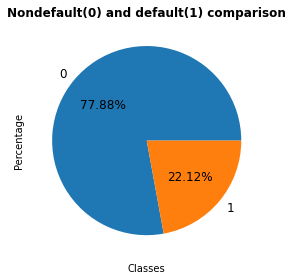

In [ ]:
# Check target classes balance

# Plot the classes
cc_data.groupby('default').size().plot(kind='pie',autopct='%1.2f%%', textprops={'fontsize': 12})
plt.title('Nondefault(0) and default(1) comparison',fontweight = "bold")
plt.xlabel('Classes')
plt.ylabel('Percentage')
plt.tight_layout()
plt.show()


*   Class imbalance is a common issue in machine learning, particularly in classification problems.
*   This dataset is also imbalanced, with 77.8% non-default and 22.1% default.

**Splitting dataset into training and test sets**

In [ ]:
# splitting train and test 80% and 20% with random state 123.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=123,stratify=y
    )

**Standardizing/ Rescaling the features**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Define function to rescale training data using StandardScaler
def scale_data(X_train, X_test):
    """
    Input: Features (numpy arrays)
    Output: Scaled data
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

X_train_scaled, X_test_scaled = scale_data(X_train, X_test)

--------------------------------------------------------------------------------
*   In order to ensure that the class imbalance in our population is fairly replicated in our train and test set.

In [ ]:
print("Proportion of non-defaulters in train set " + str(round(y_train.sum()/len(y_train) * 100,2 )) + "%")
print("Proportion of non-defaulters in test set " + str(round(y_test.sum()/len(y_test) * 100,2 )) + "%")

Proportion of non-defaulters in train set 22.12%
Proportion of non-defaulters in test set 22.12%


**Preparing a dataframe for model analysis**

SMOTE for Imbalanced data

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

#fit predictor and target variable
X_train_scaled_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.svm import SVC

In [ ]:
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score,classification_report
import warnings
warnings.simplefilter("ignore")

scoring = {'accuracy' : make_scorer(accuracy_score),
           'precision' : make_scorer(precision_score),
           'recall' : make_scorer(recall_score),
           'f1_score' : make_scorer(f1_score)}

# Spot Check Algorithms
models = []
models.append(('LogisticRegression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('XGBClassifier',xgb.XGBClassifier(objective="binary:logistic", random_state=42)))
models.append(('RandomForestClassifier', RandomForestClassifier()))

# evaluate each model in turn
results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_validate(model, X_train_scaled_smote, y_train_smote, cv=kfold, scoring=scoring)
 results.append(cv_results)
 names.append(name)
 print('%s: %f %f %f' % (name, np.mean(cv_results['test_accuracy']),np.mean(cv_results['test_precision']),np.mean(cv_results['test_recall'])))

LogisticRegression: 0.671954 0.675165 0.663046
LinearDiscriminantAnalysis: 0.672837 0.680435 0.652024
KNeighborsClassifier: 0.785271 0.733415 0.896368
DecisionTreeClassifier: 0.776978 0.768133 0.793644
XGBClassifier: 0.874458 0.916680 0.823819
RandomForestClassifier: 0.866219 0.883586 0.843614


# **Predictive modeling**



**Model Optimization**

**Grid Search on Logistic Regression Model**

In [ ]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix

In [ ]:
lr = LogisticRegression(solver='liblinear',random_state=15)

In [ ]:
lr_params = {'C': [0.001, 0.01, 0.1, 1, 10], 'class_weight': [None, 'balanced'], 'penalty': ['l1', 'l2']}


In [ ]:
grid_search_log = GridSearchCV(estimator=lr,param_grid=lr_params,scoring='accuracy',cv=5,n_jobs=-1)

In [ ]:
grid_search_log = grid_search_log.fit(X_train_scaled_smote,y_train_smote)

In [ ]:
best_accuracy = grid_search_log.best_score_

In [ ]:
print('Accuracy on Cross Validation set :',best_accuracy)

Accuracy on Cross Validation set : 0.6713391908540928


In [ ]:
best_parameters = grid_search_log.best_params_
best_parameters

{'C': 0.1, 'class_weight': None, 'penalty': 'l2'}

In [ ]:
y_pred_log = grid_search_log.predict(X_test_scaled)

In [ ]:
roc=roc_auc_score(y_test, y_pred_log)
acc = accuracy_score(y_test, y_pred_log)
prec = precision_score(y_test, y_pred_log)
rec = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)
cm = confusion_matrix(y_test, y_pred_log)


In [ ]:
model_results =  pd.DataFrame([['Logistic Regression Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.679167,0.372874,0.660889,0.47676,0.672623


In [ ]:
#print confusion matrix
cm

array([[3198, 1475],
       [ 450,  877]])

**Grid Search on Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dct = DecisionTreeClassifier(criterion = 'entropy',random_state = 0)
dct_param_grid = {'splitter':['best','random'],'criterion': ['entropy', 'gini'],'class_weight' : ['balanced',None]}
parameters = {'max_depth':[2,4,6,8,10],'min_samples_leaf':[2,4,6,8,10], 'min_samples_split':[2,4,6,8,10]}
grid_search_dt = GridSearchCV(estimator=dct,param_grid=parameters,scoring = 'accuracy',cv=5,n_jobs=-1)
grid_search_dt = grid_search_dt.fit(X_train_scaled_smote,y_train_smote)

In [ ]:
best_accuracy_1 = grid_search_dt.best_score_

In [ ]:
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8209583333333332


In [ ]:
best_parameters_2 = grid_search_dt.best_params_
best_parameters_2

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 2}

In [ ]:
y_pred_dct = grid_search_dt.predict(X_test_scaled)

In [ ]:
roc=roc_auc_score(y_test, y_pred_dct)
acc = accuracy_score(y_test, y_pred_dct)
prec = precision_score(y_test, y_pred_dct)
rec = recall_score(y_test, y_pred_dct)
f1 = f1_score(y_test, y_pred_dct)
model =  pd.DataFrame([['Decision Tree Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.679167,0.372874,0.660889,0.47676,0.672623
1,Decision Tree Tuned,0.820833,0.682609,0.354936,0.46703,0.654035


In [ ]:
cm

array([[3198, 1475],
       [ 450,  877]])

**Grid Search on XG Boost**

In [ ]:
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score,roc_curve,auc
from sklearn.metrics import confusion_matrix

In [ ]:
import xgboost as xgb
from xgboost import XGBClassifier

estimator = xgb.XGBClassifier(objective="binary:logistic", random_state=42)

parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': [10],
    'learning_rate': [0.02]}

In [ ]:
grid_search_xg = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'accuracy',
    n_jobs = 1,
    cv = 5
)

In [ ]:
grid_search_xgboost = grid_search_xg.fit(X_train_scaled_smote,y_train_smote)

In [ ]:
best_accuracy_xg = grid_search_xgboost.best_score_

In [ ]:
print('Accuracy on xg boost :',best_accuracy_xg)

Accuracy on xg boost : 0.7650225020363859


In [ ]:
best_parameters = grid_search_xgboost.best_params_
best_parameters

{'learning_rate': 0.02, 'max_depth': 9, 'n_estimators': 10}

In [ ]:
y_pred_xg= grid_search_xgboost.predict(X_test_scaled)

In [ ]:
roc=roc_auc_score(y_test, y_pred_xg)
acc = accuracy_score(y_test, y_pred_xg)
prec = precision_score(y_test, y_pred_xg)
rec = recall_score(y_test, y_pred_xg)
f1 = f1_score(y_test, y_pred_xg)
model =  pd.DataFrame([['XG Boost Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.679167,0.372874,0.660889,0.476760,0.672623
1,Decision Tree Tuned,0.820833,0.682609,0.354936,0.467030,0.654035
2,XG Boost Tuned,0.788500,0.522621,0.504898,0.513607,0.686967


**Grid Search on Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0)

In [ ]:
param_grid_rf = {'n_estimators': [200, 400, 600, 1000], # It is going to be a long search
              'criterion': ['entropy', 'gini'],
              'class_weight' : ['balanced',None]}
grid_search_rf = GridSearchCV(estimator=rfc,param_grid=param_grid_rf,scoring='accuracy',cv=5,n_jobs=-1)
grid_search_rf = grid_search_rf.fit(X_train_scaled_smote,y_train_smote)

In [ ]:
best_accuracy_1 = grid_search_rf.best_score_
print('Accuracy on Cross Validation set :',best_accuracy_1)

Accuracy on Cross Validation set : 0.8624501512145718


In [ ]:
best_parameters_2 = grid_search_rf.best_params_
best_parameters_2

{'class_weight': None, 'criterion': 'entropy', 'n_estimators': 400}

In [ ]:
y_pred_rf = grid_search_rf.predict(X_test_scaled)

In [ ]:
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf)
prec = precision_score(y_test, y_pred_rf)
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model=  pd.DataFrame([['Random Forest Tuned', acc,prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
model_results = model_results.append(model, ignore_index = True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression Tuned,0.679167,0.372874,0.660889,0.476760,0.672623
1,Decision Tree Tuned,0.820833,0.682609,0.354936,0.467030,0.654035
2,XG Boost Tuned,0.788500,0.522621,0.504898,0.513607,0.686967
3,Random Forest Tuned,0.796833,0.548301,0.461944,0.501431,0.676938



*   Logistic Regression model has the best recall.
*   XG Boost has the best Precision_Recall balance and F1 score too.



**Model Comparison**

Confusion Matrix

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt

In [ ]:
y_test.shape,y_pred_log.shape

((6000,), (6000,))

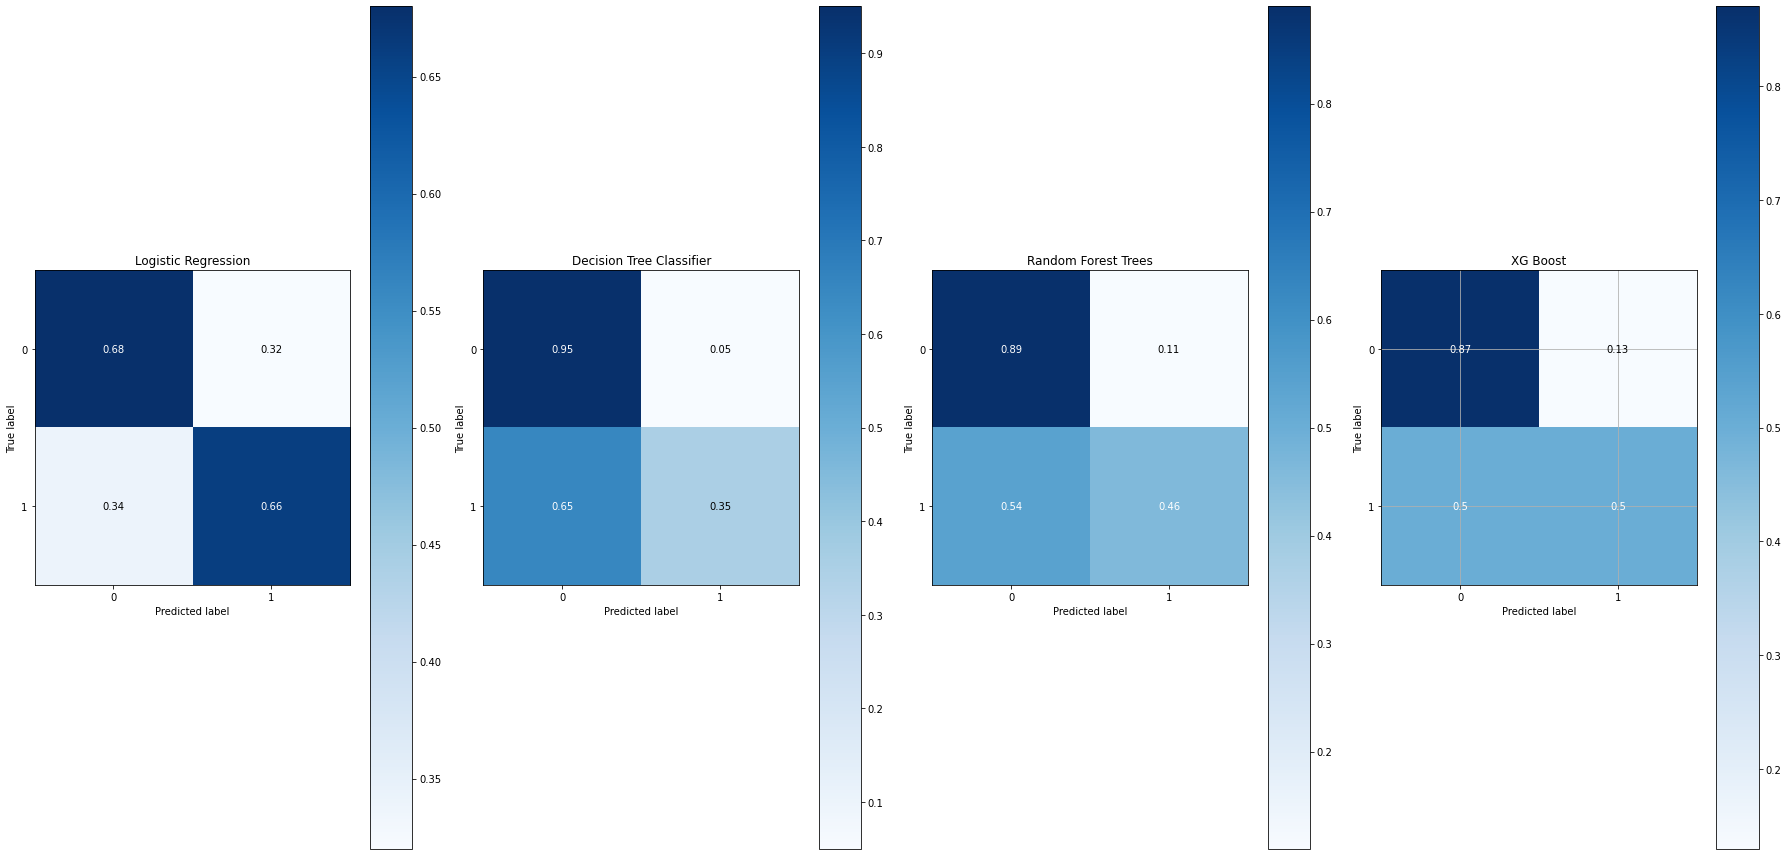

In [ ]:
fig, ax = plt.subplots(1,4, figsize=(25,12))
skplt.metrics.plot_confusion_matrix(y_test,y_pred_log,normalize=True,title="Logistic Regression",ax = ax[0])
skplt.metrics.plot_confusion_matrix(y_test,y_pred_dct,normalize=True,title="Decision Tree Classifier",ax=ax[1])
skplt.metrics.plot_confusion_matrix(y_test,y_pred_rf,normalize=True,title="Random Forest Trees",ax=ax[2])
skplt.metrics.plot_confusion_matrix(y_test,y_pred_xg,normalize=True,title="XG Boost",ax=ax[3])

#plt.title('ROC/AUC of 4 models')
plt.tight_layout()
plt.grid()

**ROC_AUC Curve**

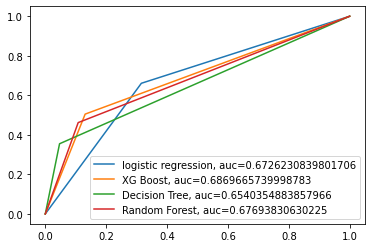

In [ ]:
from sklearn import metrics
import numpy as np
import matplotlib.pyplot as plt

plt.figure(0).clf()

# pred = np.random.rand(1000)
# label = np.random.randint(2, size=1000)
fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_log)
auc = metrics.roc_auc_score(y_test, y_pred_log)
plt.plot(fpr,tpr,label="logistic regression, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_xg)
auc = metrics.roc_auc_score(y_test, y_pred_xg)
plt.plot(fpr,tpr,label="XG Boost, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_dct)
auc = metrics.roc_auc_score(y_test, y_pred_dct)
plt.plot(fpr,tpr,label="Decision Tree, auc="+str(auc))

fpr, tpr, thresh = metrics.roc_curve(y_test, y_pred_rf)
auc = metrics.roc_auc_score(y_test, y_pred_rf)
plt.plot(fpr,tpr,label="Random Forest, auc="+str(auc))


plt.legend(loc=0)

**Precision_Recall Curve**

Since the classes are imbalanced, precision_recall curve is more approriate.

In [ ]:
from sklearn.metrics import precision_recall_curve

In [ ]:
model_lr = LogisticRegression().fit(X_train, y_train)
probs_lr = model_lr.predict_proba(X_test)[:, 1]

model_dt = DecisionTreeClassifier().fit(X_train, y_train)
probs_dt = model_dt.predict_proba(X_test)[:, 1]

model_rf = RandomForestClassifier().fit(X_train, y_train)
probs_rf = model_rf.predict_proba(X_test)[:, 1]

model_xg = XGBClassifier().fit(X_train, y_train)
probs_xg = model_xg.predict_proba(X_test)[:, 1]

In [ ]:
from sklearn.metrics import auc, precision_recall_curve

baseline_model = sum(y_test == 1) / len(y_test)

precision_lr, recall_lr, _ = precision_recall_curve(y_test, probs_lr)
auc_lr = auc(recall_lr, precision_lr)

precision_dt, recall_dt, _ = precision_recall_curve(y_test, probs_dt)
auc_dt = auc(recall_dt, precision_dt)

precision_rf, recall_rf, _ = precision_recall_curve(y_test, probs_rf)
auc_rf = auc(recall_rf, precision_rf)

precision_xg, recall_xg, _ = precision_recall_curve(y_test, probs_xg)
auc_xg = auc(recall_xg, precision_xg)

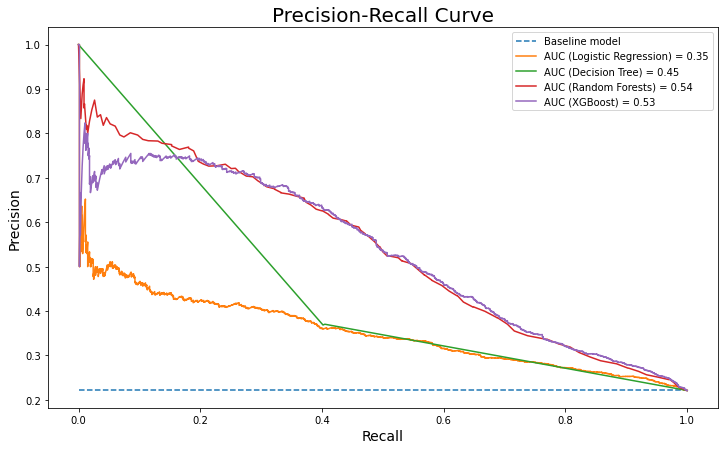

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot([0, 1], [baseline_model, baseline_model], linestyle='--', label='Baseline model')
plt.plot(recall_lr, precision_lr, label=f'AUC (Logistic Regression) = {auc_lr:.2f}')
plt.plot(recall_dt, precision_dt, label=f'AUC (Decision Tree) = {auc_dt:.2f}')
plt.plot(recall_rf, precision_rf, label=f'AUC (Random Forests) = {auc_rf:.2f}')
plt.plot(recall_xg, precision_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')
plt.title('Precision-Recall Curve', size=20)
plt.xlabel('Recall', size=14)
plt.ylabel('Precision', size=14)
plt.legend();

# **Feature importance**

In [ ]:
from xgboost import plot_importance


Text(0.5, 1.0, 'Features importance')

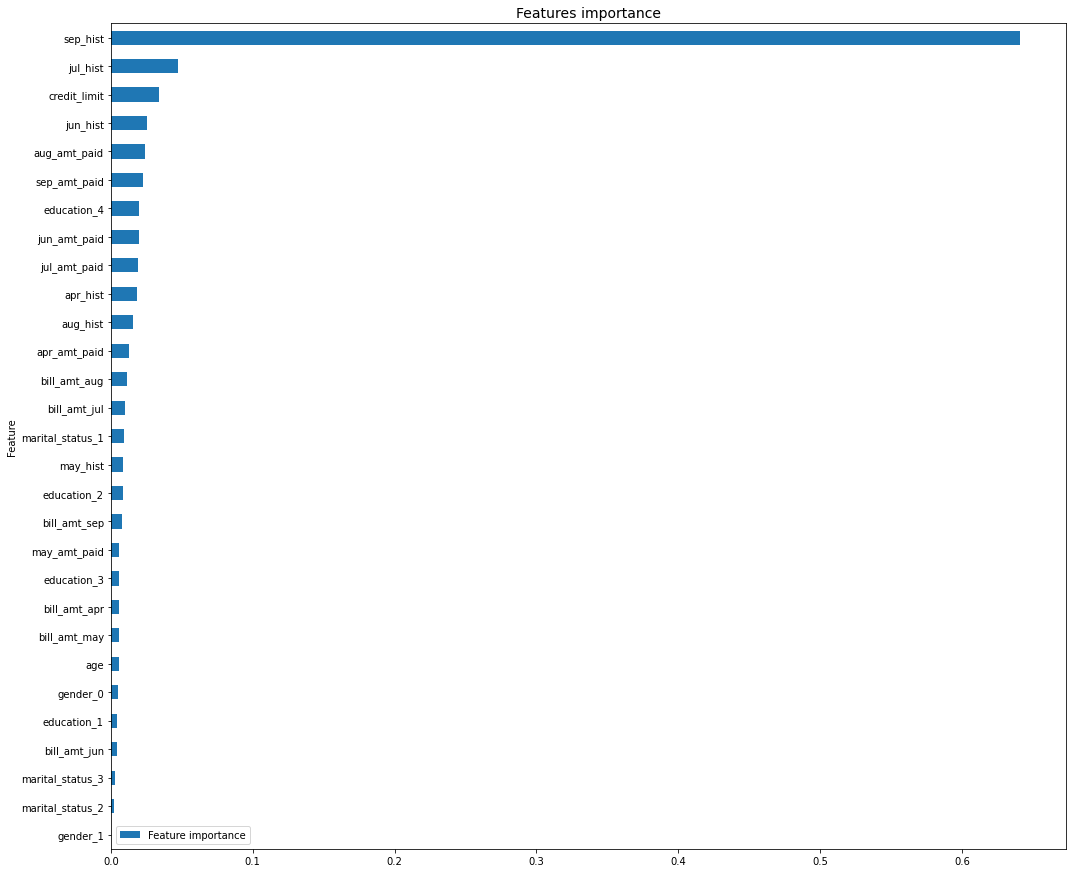

In [ ]:
# Plot feature importance of winner model - XG Boost

fea_df = pd.DataFrame({'Feature': feature_cols, 'Feature importance': grid_search_xgboost.best_estimator_.feature_importances_})
fea_df = fea_df.sort_values(by='Feature importance',ascending=True)

figure, ax = plt.subplots(figsize = (15,12))
fea_df.plot.barh(x='Feature',y='Feature importance', ax=ax)
plt.tight_layout()
plt.title('Features importance',fontsize=14)



*   "sep_hist" and "jul_hist" are the most recent 2 months' payment status and they are the strongest predictors of future payment default risk.

**----------------------------------------------------------------------------------------------------------------------------------------------------------------**

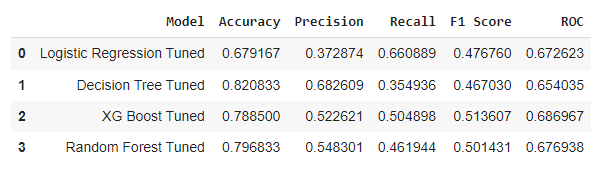

**Conclusion:**
*   With every classification model, there is a general trade-off between precision and recall.
*   A model’s recall can be adjusted to arbitrarily high at the cost of lower precision.
*   In these four models, the Logistic Regression model has the highest recall but the lowest precision; if the company expects a high recall, then this model is the best candidate.
*   Random forest values are almost closer to XG Boost.
*   If the balance of recall and precision is the most important metric, then XG Boost is the ideal model.
*   Since XG Boost has a balanced precision-recall, with high f1 score, **we recommend the XG Boost model.**








**----------------------------------------------------------------------------------------------------------------------------------------------------------------**